## Dune Case Study

In [6]:
# Import Libraries 
import pandas as pd # Data prepocessing 
import matplotlib.pyplot as plt # Data Visualization 
import seaborn as sns # Data Visualization
from collections import Counter # Counter

In [2]:
import missingno as msno # Missing Data - Data Visualization

ModuleNotFoundError: No module named 'missingno'

In [117]:
# Load the dataset 

df = pd.read_csv(r"C:\Users\Holiness\Downloads\Dune Sales Data.csv") 

In [8]:
# Print the top rows 
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [9]:
# Print the bottom rows 
df.tail() # Bottom 5 

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34862,7-Feb-16,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,2.0,1160.0,985.50
34863,13-Mar-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2049.0,1583.00
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.0,1568.00
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Dimensionality of the data - The number of rows and columns 
df.shape

(34867, 12)

In [11]:
# Examine the columns/features of the data
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [12]:
# Investigate the dataset for annomalies and data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [13]:
# Numerical Statistics Analysis 
df.describe()

,Customer_Age,Quantity,Unit_Cost,Unit_Price
count,34867.000000,34866.000000,34866.000000,34866.000000
mean,36.382683,2.002524,349.880567,389.232473
std,11.112813,0.813936,490.015846,525.319097
min,17.000000,1.000000,0.670000,0.670000
25%,28.000000,1.000000,45.000000,53.670000
50%,35.000000,2.000000,150.000000,179.000000
75%,44.000000,3.000000,455.000000,521.000000
max,87.000000,3.000000,3240.000000,5082.000000


In [14]:
# the median is 50% 

In [15]:
# Categorical Statistics Analysis 
df.describe(include=["object", "bool"])

,Date,Customer,Sales Person,Customer_Gender,State,Product_Category,Sub_Category,Payment Option
count,34866,34866,34866,34866,34866,34866,34866,34866
unique,576,4,7,2,36,3,17,3
top,1-Mar-16,Low,Remota,F,Lagos,Accessories,Keyboard,Cash
freq,196,13041,6667,17439,10332,22534,11112,15911


## Dealing with missing data - 

In [16]:
# Investigate the missing data
null_vals = df.isnull().sum()
null_vals

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

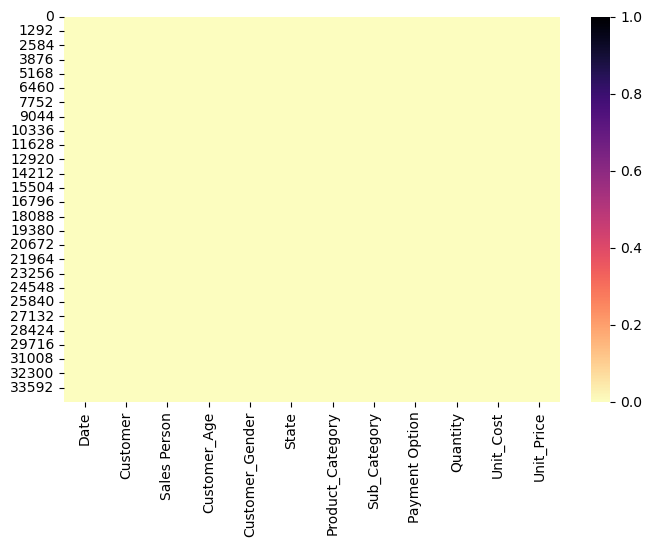

In [17]:
# Visualize the missing data 
plt.figure(figsize = (8,5))
sns.heatmap(df.isnull(),cbar=True, cmap="magma_r");

In [18]:
# Display where the missing data exist in the data 
df[df.isnull().any(axis=1)]

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Drop the missing data 
df.dropna(inplace=True)

In [21]:
df.isnull().sum()

Date                0
Customer            0
Sales Person        0
Customer_Age        0
Customer_Gender     0
State               0
Product_Category    0
Sub_Category        0
Payment Option      0
Quantity            0
Unit_Cost           0
Unit_Price          0
dtype: int64

In [23]:
# Datatime Analysis
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5


In [26]:
# Convert the data column into a pandas datetime object 
df["Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34866 entries, 0 to 34865
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Customer          34866 non-null  object        
 2   Sales Person      34866 non-null  object        
 3   Customer_Age      34866 non-null  int64         
 4   Customer_Gender   34866 non-null  object        
 5   State             34866 non-null  object        
 6   Product_Category  34866 non-null  object        
 7   Sub_Category      34866 non-null  object        
 8   Payment Option    34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit_Cost         34866 non-null  float64       
 11  Unit_Price        34866 non-null  float64       
 12  Year              34866 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(7)
memory usage: 3.6

In [105]:
# Extract the Year, Month, Quarter

df['Year'] = df["Date"].dt.year
df['month'] = df["Date"].dt.month
df['month_name'] = df["Date"].dt.month_name()
df['quarter'] = df["Date"].dt.quarter

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Year,age_group,cost,revenue,profit,profit_label,year,month,month_name,quarter
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,2016,25-40 Adult,80.0,109.0,29.0,Profit,2016,2,February,1
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,2016,25-40 Adult,49.0,57.0,8.0,Profit,2016,2,February,1


In [27]:
# Group Customer age 
def age_group(x):
    if x <= 25:
        return "<=25 Young Adult"
    elif x <= 40: 
        return "25-40 Adult"
    elif x <= 50:
        return "41-50 Old Adult"
    else:
        return ">=51 Elders" 

# Apply function to the data 
df["age_group"] = df["Customer_Age"].apply(age_group)
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,Year,age_group
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,1,25-40 Adult
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,1,25-40 Adult


In [28]:
# Cost, Revenue and Profit calculations
df["cost"] = df["Quantity"]*df["Unit_Cost"]
df["revenue"] = df["Quantity"]*df["Unit_Price"]
df["profit"] = df["revenue"] - df["cost"]

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,Year,age_group,cost,revenue,profit
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,1,25-40 Adult,80.0,109.0,29.0
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,1,25-40 Adult,49.0,57.0,8.0


In [29]:
# Profit/Loss grouping 
def porl(x):
    if x >= 0:
        return "Profit"
    else:
        return "Loss"

df["profit_label"] = df['profit'].apply(porl)
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,Year,age_group,cost,revenue,profit,profit_label
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,1,25-40 Adult,80.0,109.0,29.0,Profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,1,25-40 Adult,49.0,57.0,8.0,Profit


## Univariate Analysis 
- it involves analyzing the distribution and summary statistis of individual variables/Column/feature. 

In [30]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Year', 'age_group', 'cost',
       'revenue', 'profit', 'profit_label'],
      dtype='object')

### Categorical Data Visualization

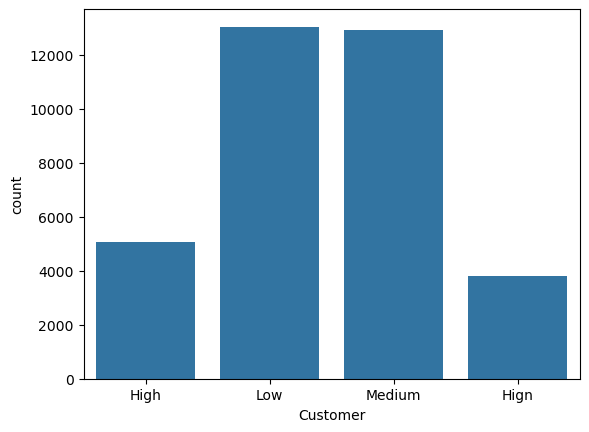

In [31]:
# How many customers belong to each customer spec

sns.countplot(x="Customer", data=df);

In [32]:
# Investigate the columns affected
df[df["Customer"] == "Hign"].head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,Year,age_group,cost,revenue,profit,profit_label
29770,2015-08-03,Hign,Derick,28,F,Lagos,Phones,IPhone,Cash,1.0,2295.00,2136.00,3,25-40 Adult,2295.00,2136.00,-159.0,Loss
29771,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,2.0,17.50,19.50,3,25-40 Adult,35.00,39.00,4.0,Profit
29772,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,16.67,18.67,3,25-40 Adult,50.01,56.01,6.0,Profit


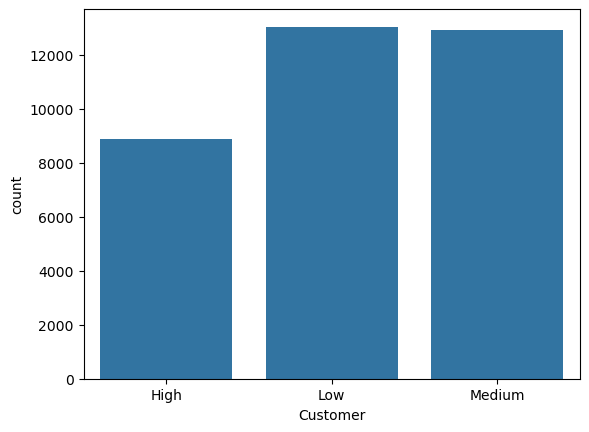

In [33]:
# Correct the spelling of HIGN
df.loc[df["Customer"] == "Hign", "Customer"] = "High"

sns.countplot(x="Customer", data=df);

In [34]:
df["Customer"].value_counts()

Customer
Low       13041
Medium    12926
High       8899
Name: count, dtype: int64

In [35]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Year', 'age_group', 'cost',
       'revenue', 'profit', 'profit_label'],
      dtype='object')

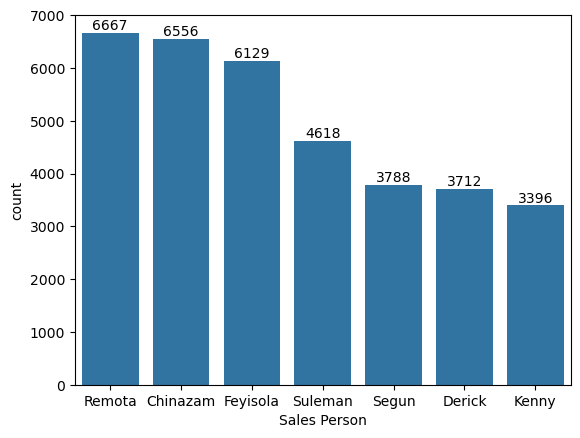

In [36]:
# Sales Person - How many transactions by sales person 
ax = sns.countplot(x=df["Sales Person"], order=df["Sales Person"].value_counts(ascending=False).index)
values = df["Sales Person"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

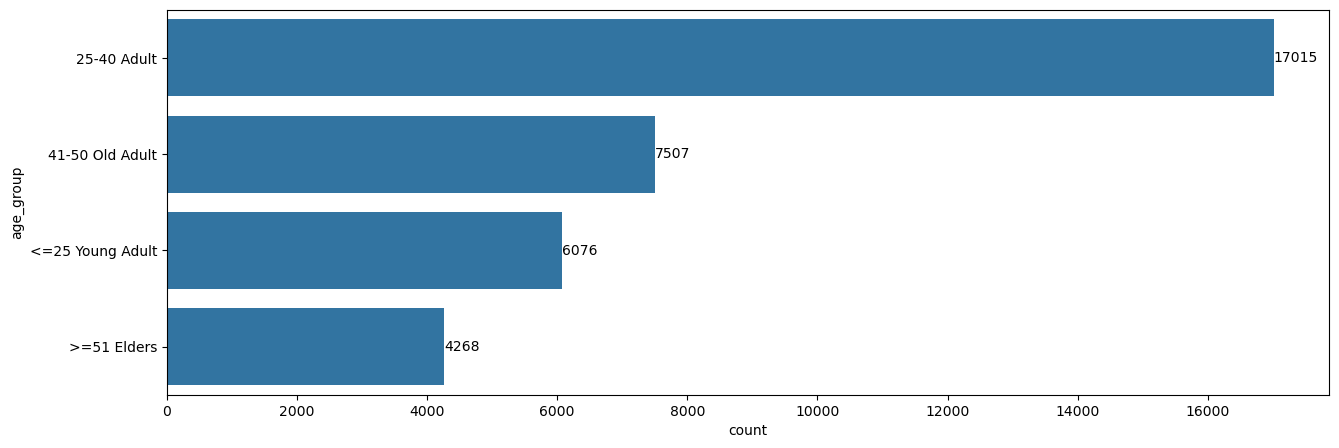

In [37]:
# Total transactions by Customer Age Group 

plt.figure(figsize=(15,5))

ax = sns.countplot(y=df["age_group"], order=df["age_group"].value_counts(ascending=False).index)
values = df["age_group"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

In [38]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Year', 'age_group', 'cost',
       'revenue', 'profit', 'profit_label'],
      dtype='object')

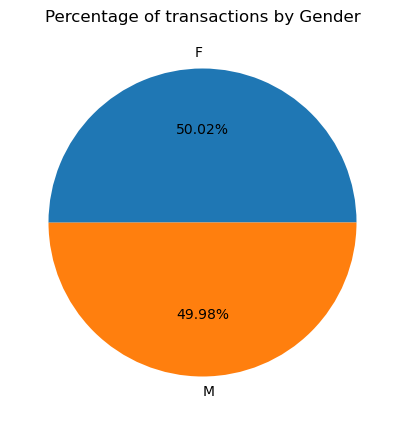

In [39]:
# Total Transactions by Customer Gender 

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df["Customer_Gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of transactions by Gender")
plt.show();

State
Lagos        10332
Abuja         6421
Abia          5206
Adamawa       2446
Akwa Ibom     1287
Edo           1229
Anambra       1171
Bauchi        1112
Bayelsa       1092
Benue          869
Name: count, dtype: int64


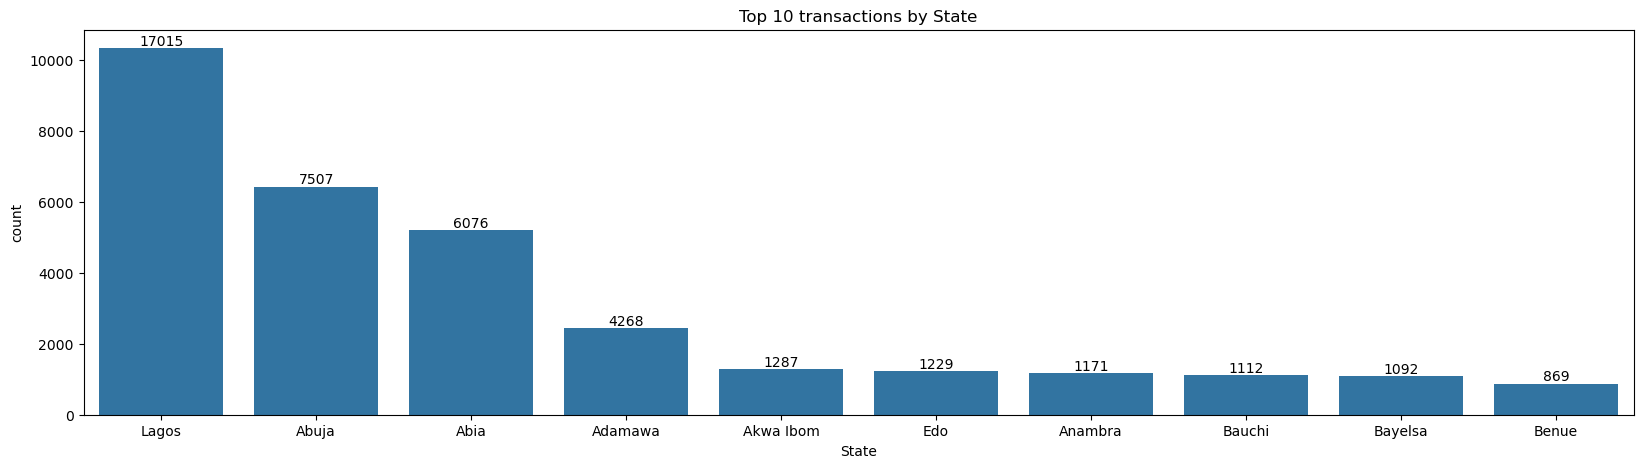

In [40]:
# Total top 10 transactions by state
plt.figure(figsize=(20,5))
topten = df["State"].value_counts().head(10)
ax = sns.countplot(x="State", data=df, order=topten.index)
ax.bar_label(container=ax.containers[0], labels=values);
ax.set_title("Top 10 transactions by State")
print(topten)

In [41]:
# Product Category 
# Sub Category 
# Payment option 
# Month Name 

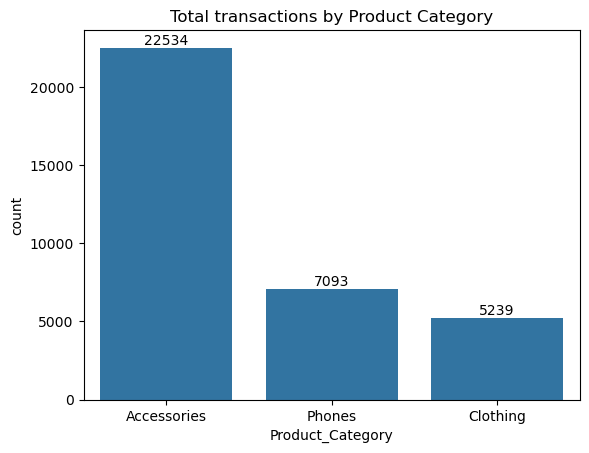

In [42]:
# Product Category 

ax = sns.countplot(x=df["Product_Category"], order=df["Product_Category"].value_counts(ascending=False).index)
values = df["Product_Category"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
ax.set_title("Total transactions by Product Category");

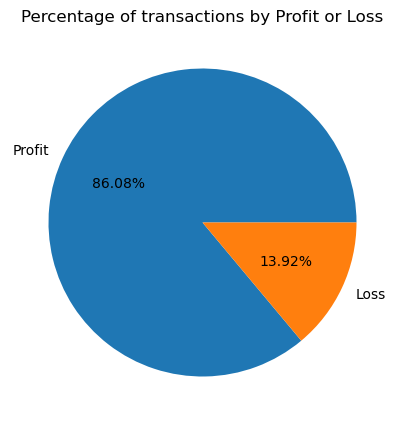

In [43]:
# Total transaction by Profit or Loss 

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df["profit_label"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of transactions by Profit or Loss")
plt.show();


### Numerical Data Visualization 

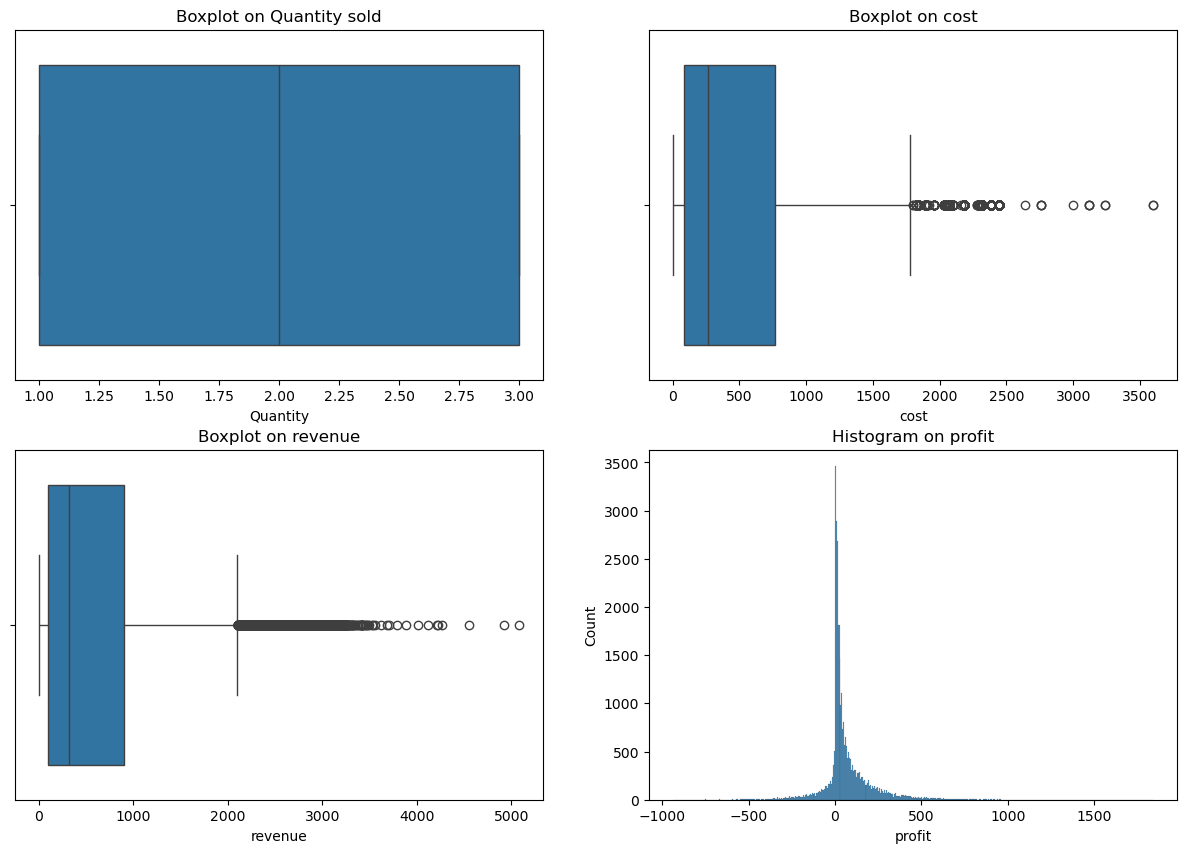

In [47]:
# Quantity, Cost, Revenue and Profit - Subplot 

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.boxplot(x="Quantity", data=df, ax=axs[0,0])
axs[0,0].set_title("Boxplot on Quantity sold")

sns.boxplot(x="cost", data=df, ax=axs[0,1])
axs[0,1].set_title("Boxplot on cost")

sns.boxplot(x="revenue", data=df, ax=axs[1,0])
axs[1,0].set_title("Boxplot on revenue")

sns.histplot(x="profit", data=df, ax=axs[1,1])
axs[1,1].set_title("Histogram on profit");


### Bivariate Analysis 
- involves analyzing the relationship between two variables 

In [48]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Year', 'age_group', 'cost',
       'revenue', 'profit', 'profit_label'],
      dtype='object')

''

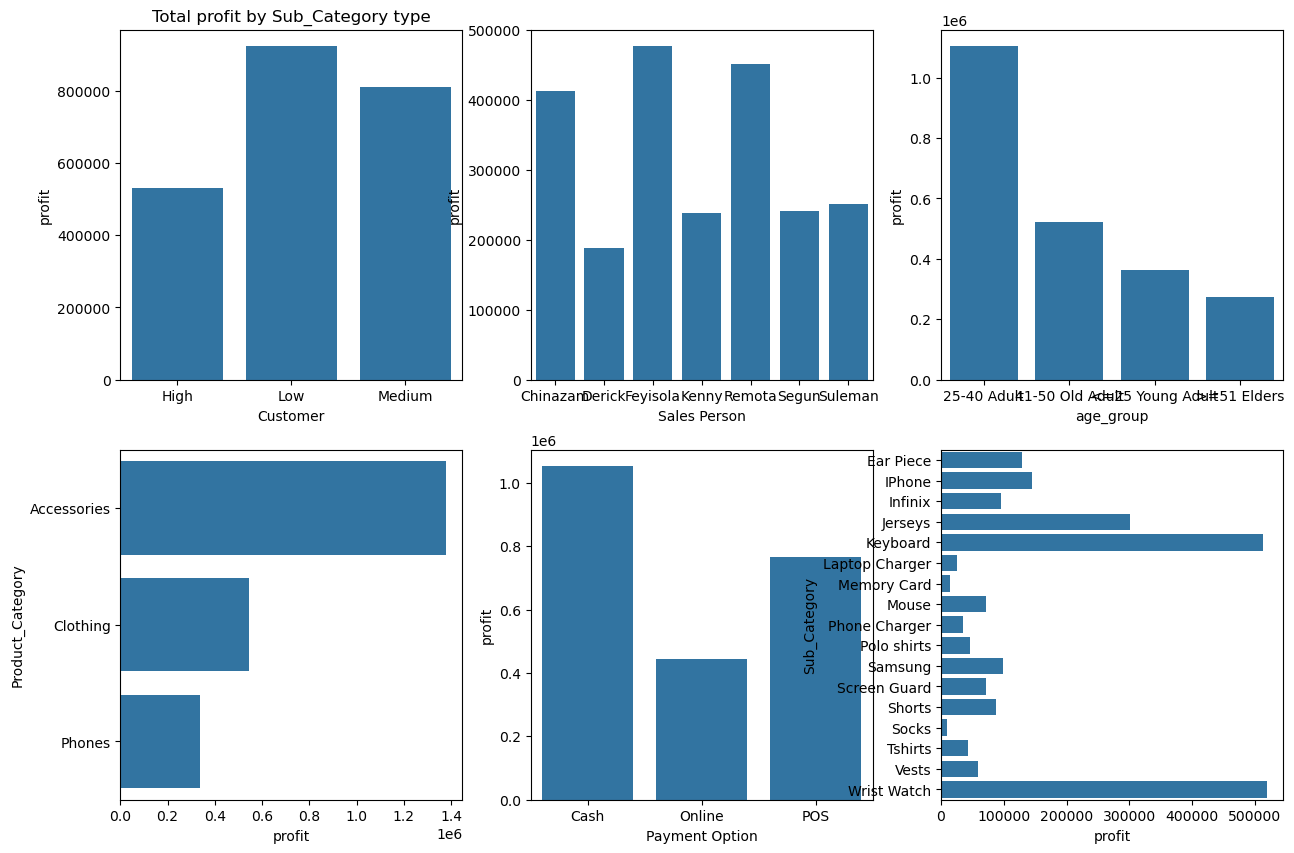

In [51]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

cust_prof = df.groupby("Customer")["profit"].sum().reset_index()
sns.barplot(x='Customer', data=cust_prof, y='profit', ax=axs[0,0])
axs[0,0].set_title("Total profit by customer type")

sp_prof = df.groupby("Sales Person")["profit"].sum().reset_index()
sns.barplot(x='Sales Person', data=sp_prof, y='profit', ax=axs[0,1])
axs[0,0].set_title("Total profit by Sales Person type")

ag_prof = df.groupby("age_group")["profit"].sum().reset_index()
sns.barplot(x='age_group', data=ag_prof, y='profit', ax=axs[0,2])
axs[0,0].set_title("Total profit by age_group")

pc_prof = df.groupby("Product_Category")["profit"].sum().reset_index()
sns.barplot(y='Product_Category', data=pc_prof, x='profit', ax=axs[1,0])
axs[0,0].set_title("Total profit by Product_Category")

po_prof = df.groupby("Payment Option")["profit"].sum().reset_index()
sns.barplot(x='Payment Option', data=po_prof, y='profit', ax=axs[1,1])
axs[0,0].set_title("Total profit by customer type")

sc_prof = df.groupby("Sub_Category")["profit"].sum().reset_index()
sns.barplot(y='Sub_Category', data=sc_prof, x='profit', ax=axs[1,2])
axs[0,0].set_title("Total profit by Sub_Category type")

;

''

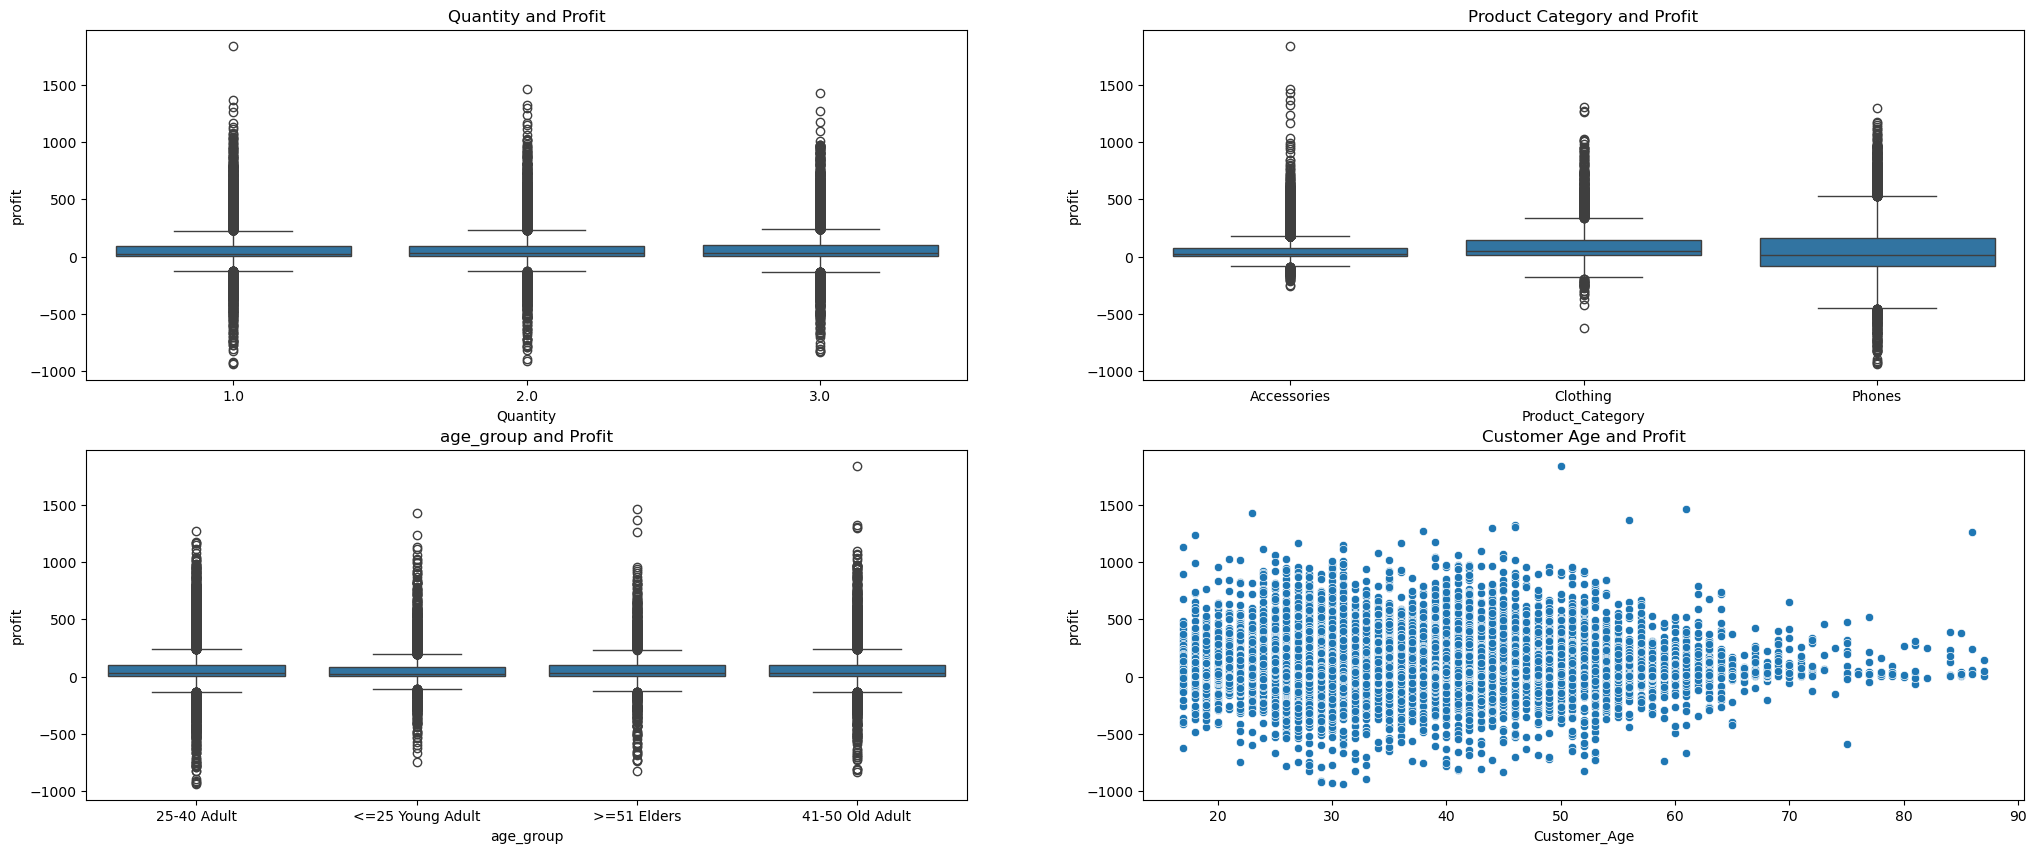

In [73]:
# Numerical Columns

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

sns.boxplot(x='Quantity', y='profit', data=df, ax=axs[0,0])
axs[0,0].set_title("Quantity and Profit")

sns.boxplot(x='Product_Category', y='profit', data=df, ax=axs[0,1])
axs[0,1].set_title("Product Category and Profit")

sns.boxplot(x='age_group', y='profit', data=df, ax=axs[1,0])
axs[1,0].set_title("age_group and Profit")

sns.scatterplot(x='Customer_Age', y='profit', data=df, ax=axs[1,1])
axs[1,1].set_title("Customer Age and Profit")

;

### Multivariate Analysis 

- It involves analyzing the relationship between three or more variables 

In [74]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Year', 'age_group', 'cost',
       'revenue', 'profit', 'profit_label'],
      dtype='object')

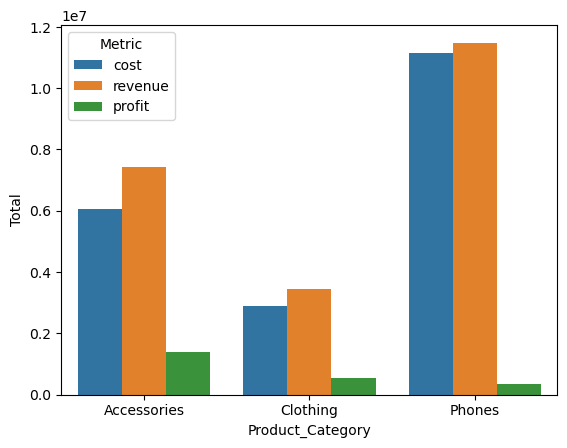

In [75]:
# Product Category against Cost, Revenue and Profit 

procat = df.groupby("Product_Category")[["cost", "revenue", "profit"]].sum().reset_index()
procat = pd.melt(procat, id_vars="Product_Category", var_name="Metric", value_name="Total")
sns.barplot(data=procat,x = 'Product_Category', y="Total", hue="Metric");

In [69]:
procat

,Product_Category,Metric,Total
0,Accessories,cost,6041896.06
1,Clothing,cost,2892324.94
2,Phones,cost,11148745.02
3,Accessories,revenue,7420663.12
4,Clothing,revenue,3437556.95
5,Phones,revenue,11486354.63
6,Accessories,profit,1378767.06
7,Clothing,profit,545232.01
8,Phones,profit,337609.61


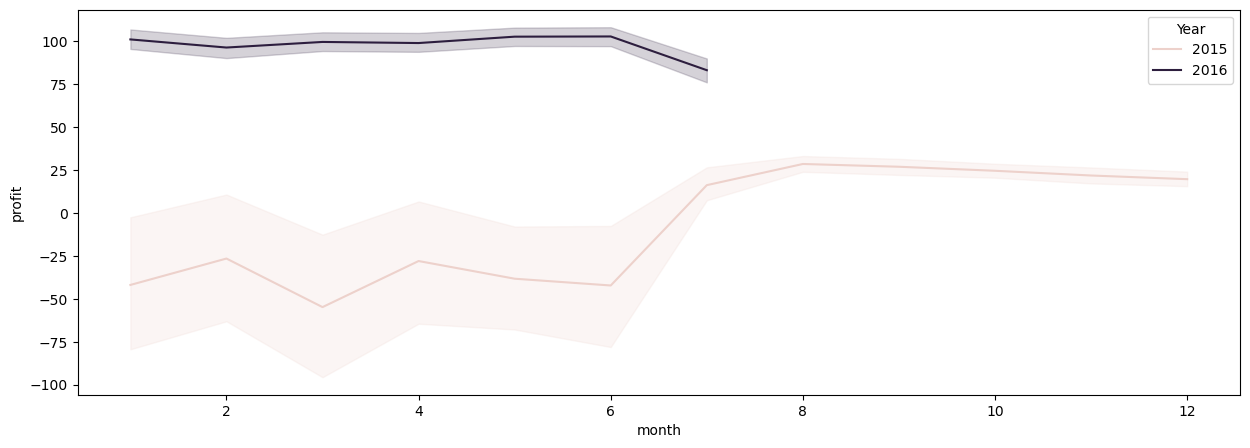

In [94]:
plt.figure(figsize=(15,5))
sns.lineplot(x='month', y="profit", data=df, hue='Year');

In [95]:
# Using pivot table 
df.pivot_table(values='profit', index='Year', columns= 'month', aggfunc= 'sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2015,-5778.70,-4079.65,-8163.79,-4945.69,-7801.45,-8690.61,15104.47,65926.24,62172.33,62950.66,54480.9,67448.12
2016,280204.25,263640.18,299777.67,307746.51,356915.59,357549.86,107151.79,NaN,NaN,NaN,NaN,NaN


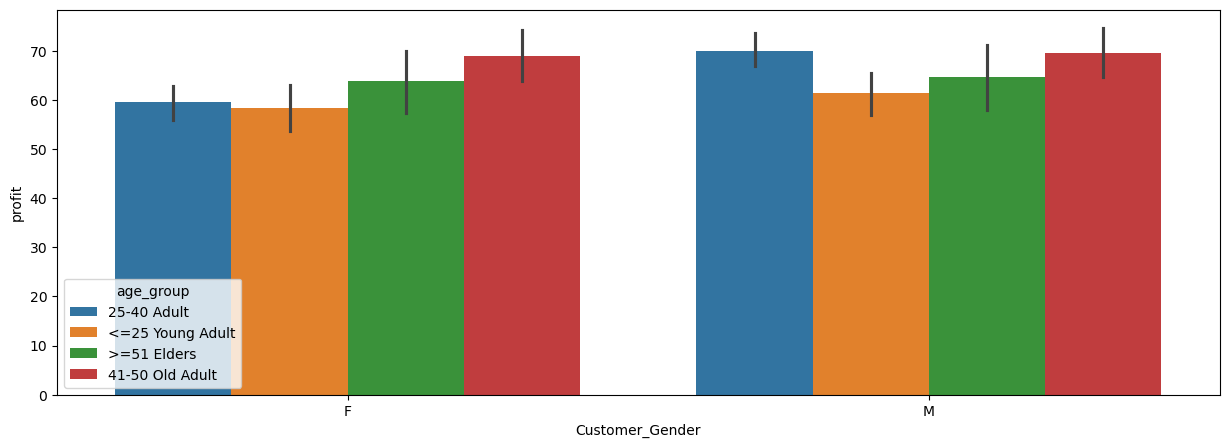

In [82]:
# Customer Gender, Age Group, and Profit 

plt.figure(figsize=(15,5))
sns.barplot(x="Customer_Gender", y='profit', data=df, hue="age_group");

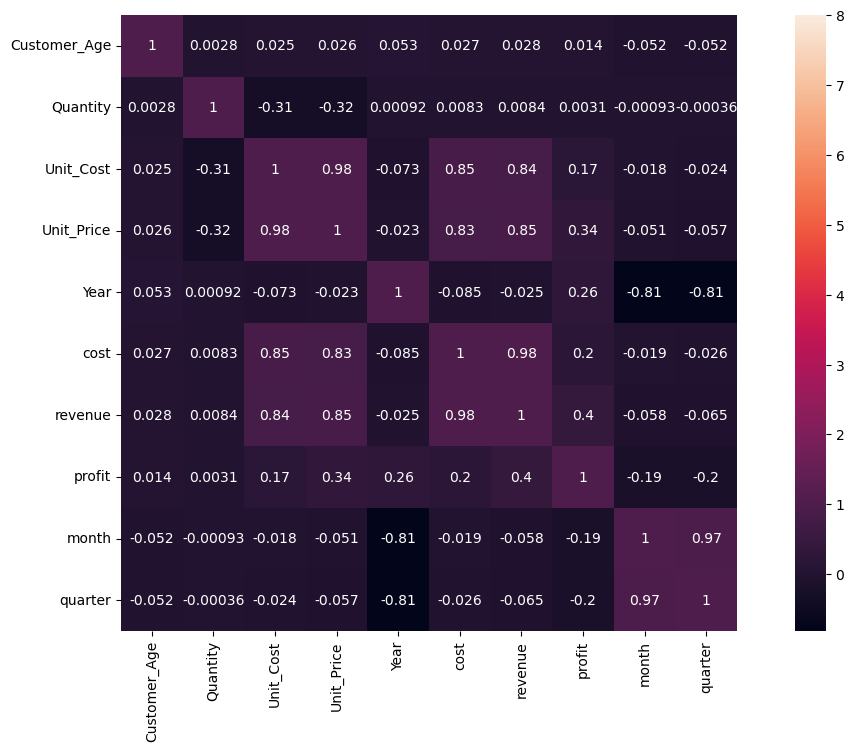

In [111]:
# Correlation 
a = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(15,8))
sns.heatmap(a,vmax=8, square=True, annot=True);

C:\Users\Holiness\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


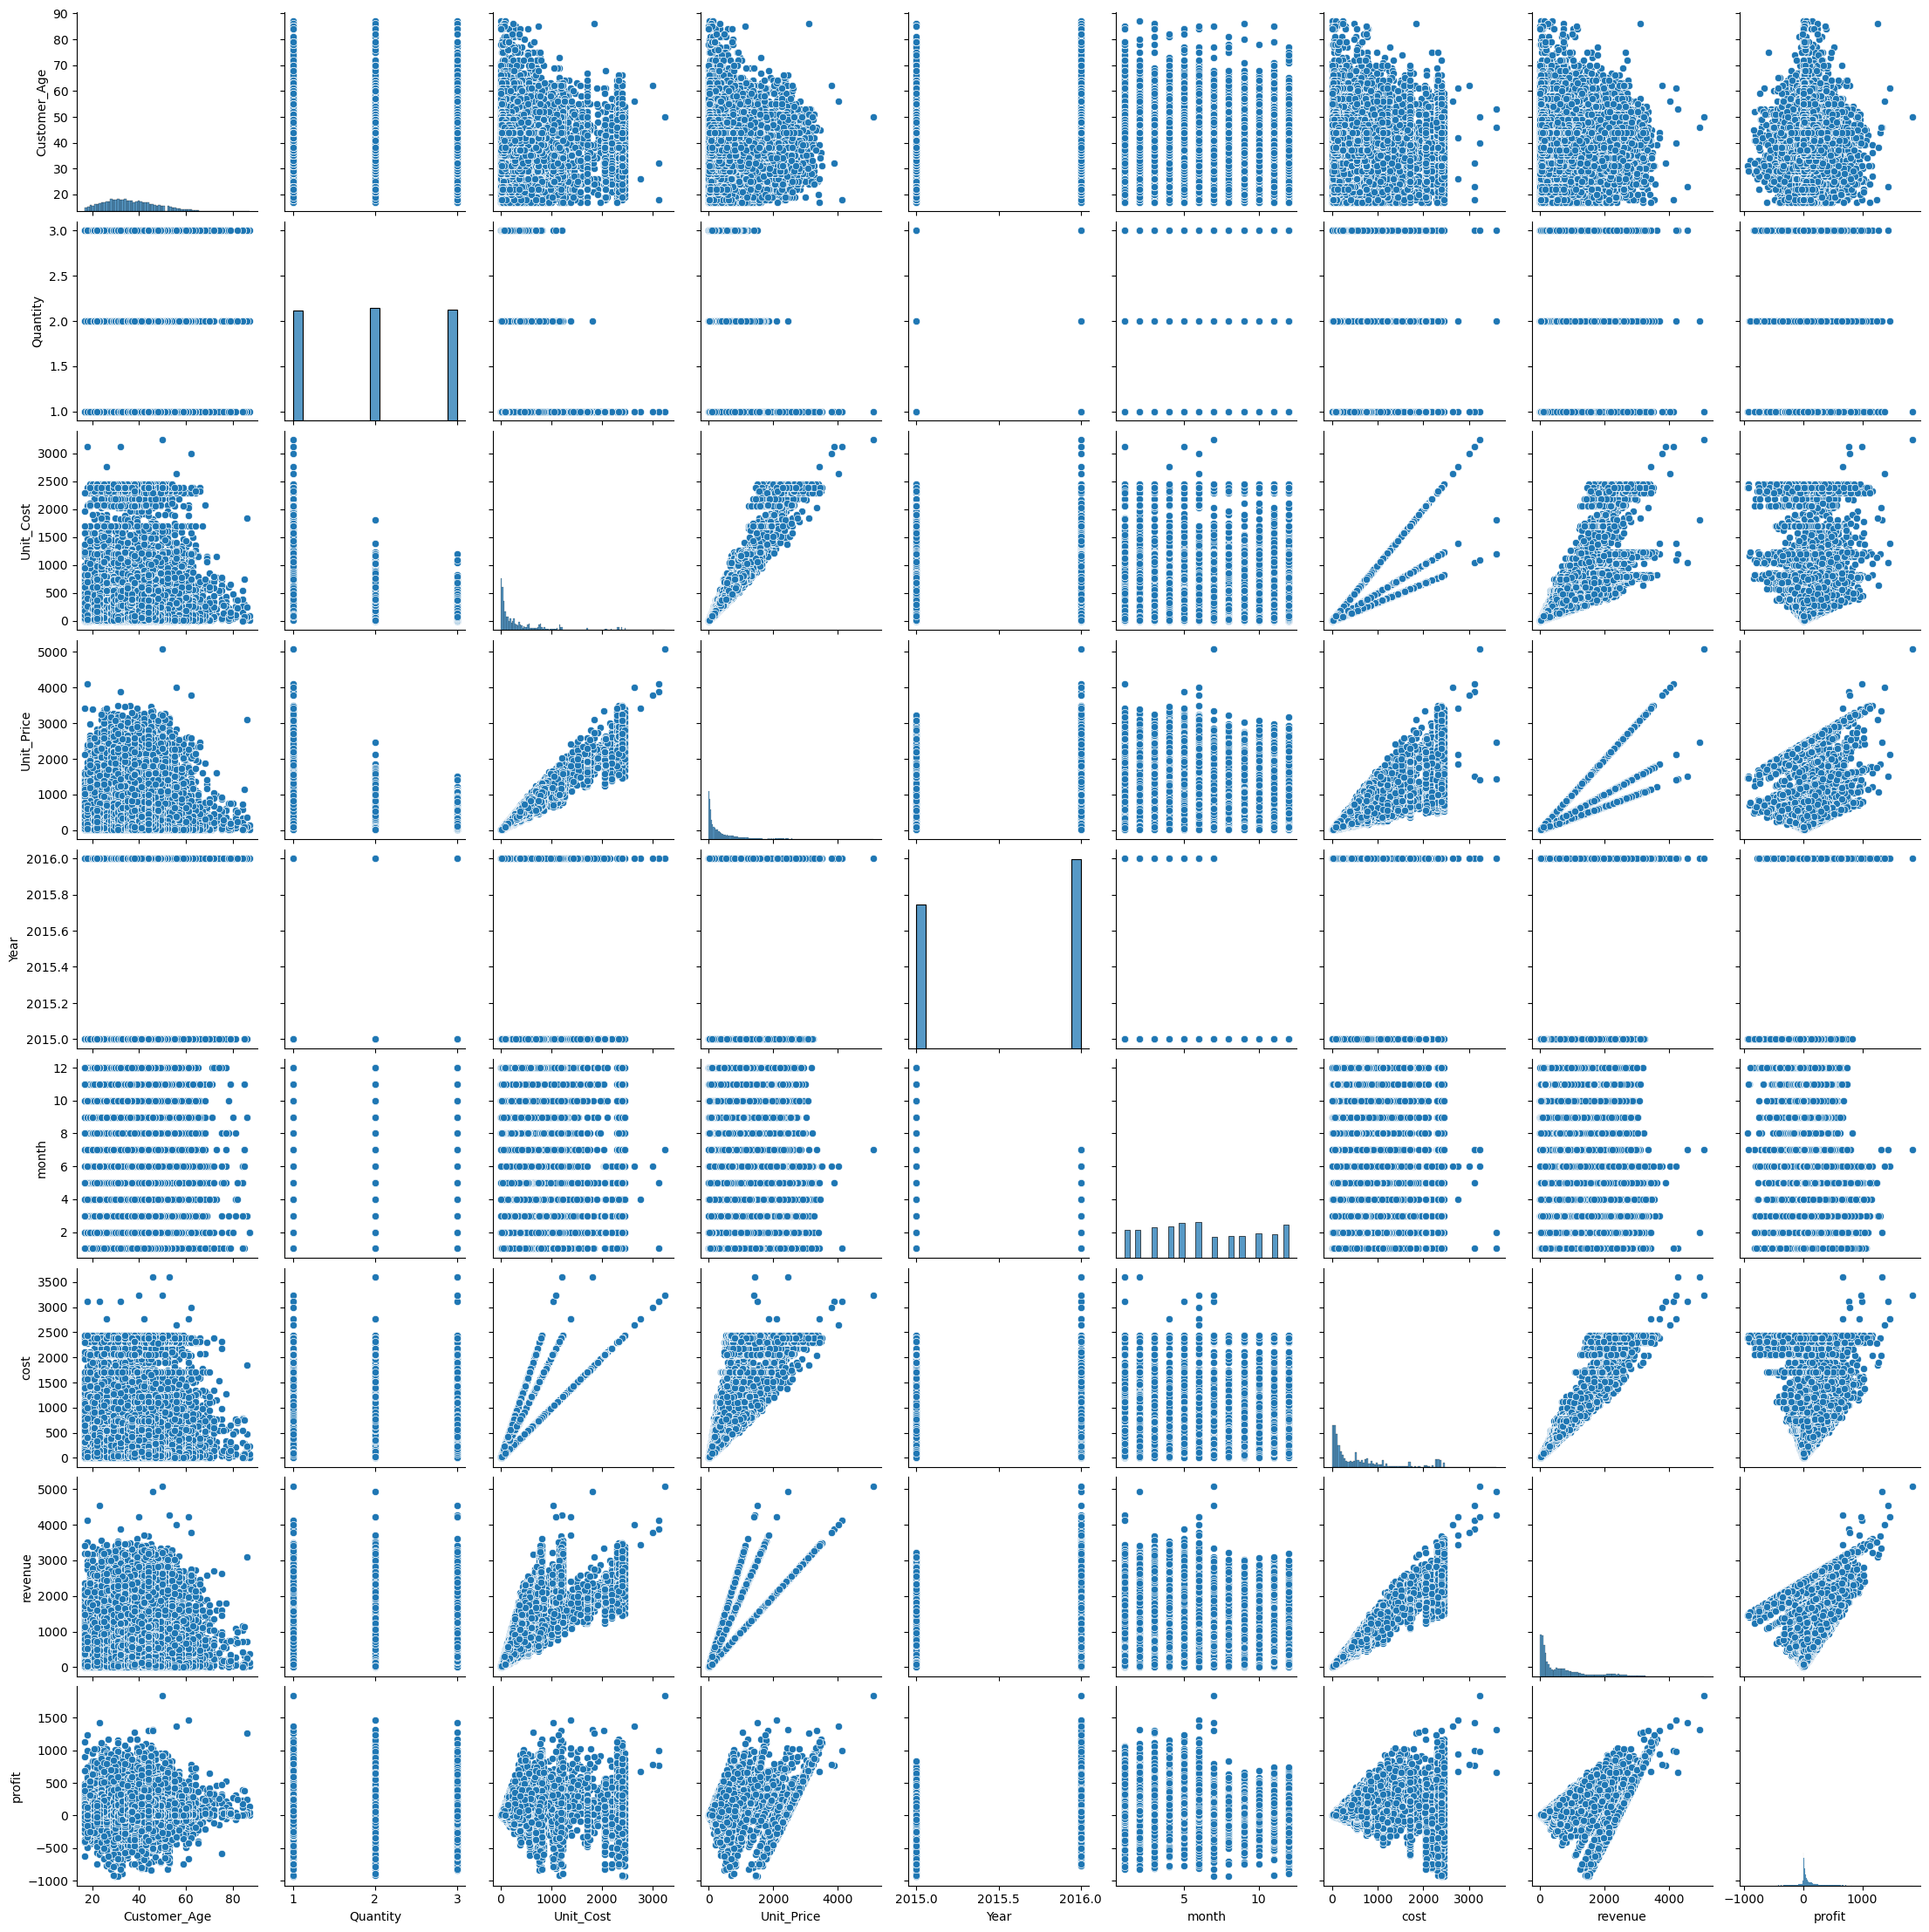

In [115]:
sns.pairplot(df, size=2.5); 